# ErSE 394 — Geo-Environmental Modeling & Analysis
## Assignment 6 (Estimation of Open Water Evaporation in Wadi Murwani Reservoir Using ECMWF ERA5)

### Part 2

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# import cdsapi

# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': [
#             '2m_temperature', 'total_precipitation',
#         ],
#         'year': [
#             '2018', '2019', '2020',
#             '2021', '2022', '2023',
#         ],
#         'month': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': [
#             23, 39, 22,
#             40,
#         ],
#     },
#     'download.nc')

#### 2. Load the dataset using the Dataset function from the netCDF4 module. Be sure to specify the correct file path for the dataset:

In [3]:
fpath = os.path.join(os.getcwd(), 'ERA5_Data', 'download.nc')
dset = xr.open_dataset(fpath, decode_times=False)

#### 3. Extract the relevant variables from the dataset, including air temperature (t2m), precipitation (tp), latitude, longitude, and time. Then, convert these variables into numpy arrays for further processing:

In [4]:
t2m = np.array(dset.variables['t2m'])
tp = np.array(dset.variables['tp'])
latitude = np.array(dset.variables['latitude'])
longitude = np.array(dset.variables['longitude'])
time = np.array(dset.variables['time'])

In [5]:
dset.variables['time']

<xarray.IndexVariable 'time' (time: 52379)>
array([1034376, 1034377, 1034378, ..., 1086752, 1086753, 1086754])
Attributes:
    units:      hours since 1900-01-01 00:00:00.0
    long_name:  time
    calendar:   gregorian

In [6]:
print((t2m[t2m==-32767]).sum())
print((tp[tp==-32767]).sum())

0.0
0.0


#### 4. Identify and replace missing values in the t2m and tp arrays, represented by−32767, with NaNs (Not a Number):

In [7]:
# t2m[t2m==-32767] = np.NaN
# tp[tp==-32767] = np.NaN

#### 5. Convert the air temperature from K to ◦C and precipitation from m/h to mm/h for more intuitive interpretation:

In [8]:
t2m = t2m - 273.15
tp = tp * 1000

In [9]:
type(time)

numpy.ndarray

In [10]:
time

array([1034376, 1034377, 1034378, ..., 1086752, 1086753, 1086754])

In [11]:
type(time[0])

numpy.int32

#### 6. Transform the time data to datetime values using list comprehension, a method that allows for the efficient creation of a new list by applying an operation to each item in an existing sequence. This step requires importing the datetime module. Here, each hour count since 1900-01-01 in the time array is converted into a datetime object, resulting in a more readable time format:

In [12]:
import datetime
time_dt = [datetime.datetime(1900,1,1) + datetime.timedelta(hours=int(t)) for t in time]

#### 7. If the ERA5 dataset has four dimensions, indicating the presence of both final and preliminary data, compute the mean across the second dimension to simplify the dataset:

In [13]:
if t2m.ndim == 4:
    t2m = np.nanmean(t2m, axis=1)
    tp = np.nanmean(tp, axis=1)

#### 8. Create a Pandas dataframe containing time series data for both air temperature and precipitation. Focus on the grid cell closest to the reservoir (row 3, column 2):

In [14]:
import pandas as pd
df_era5 = pd.DataFrame(index=time_dt)
df_era5['t2m'] = t2m[:,3,2]
df_era5['tp'] = tp[:,3,2]

#### 9. Finally, plot the time series with the following commands:

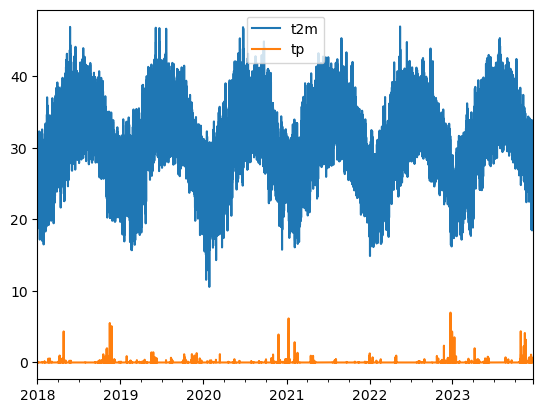

In [15]:
df_era5.plot()
plt.show()

#### 10. What is the temporal range covered by this ERA5 data?
This is an hourly data starting from 2018-01-01 to 2023-12-23

In [16]:
df_era5

,t2m,tp
2018-01-01 00:00:00,25.183167,0.015377
2018-01-01 01:00:00,25.193542,0.001042
2018-01-01 02:00:00,24.517334,0.000000
2018-01-01 03:00:00,24.180511,0.000000
2018-01-01 04:00:00,24.256287,0.005733
...,...,...
2023-12-23 06:00:00,25.027069,0.524126
2023-12-23 07:00:00,24.848938,0.177489
2023-12-23 08:00:00,26.184540,0.144128
2023-12-23 09:00:00,26.092560,0.060205


#### 11. What is the average monthly precipitation?

In [17]:
df_era5['tp'].resample('M').mean()

2018-01-31    0.000822
2018-02-28    0.003895
2018-03-31    0.000422
2018-04-30    0.039322
2018-05-31    0.002637
                ...   
2023-08-31    0.000974
2023-09-30    0.001484
2023-10-31    0.010097
2023-11-30    0.051732
2023-12-31    0.024345
Freq: M, Name: tp, Length: 72, dtype: float32

#### 12. What is the cumulative precipitation over the entire period?

In [18]:
df_era5['tp'].sum()

526.2771

In [19]:
df_era5.shape

(52379, 2)

#### 13. Identify and visualize extreme temperature events.

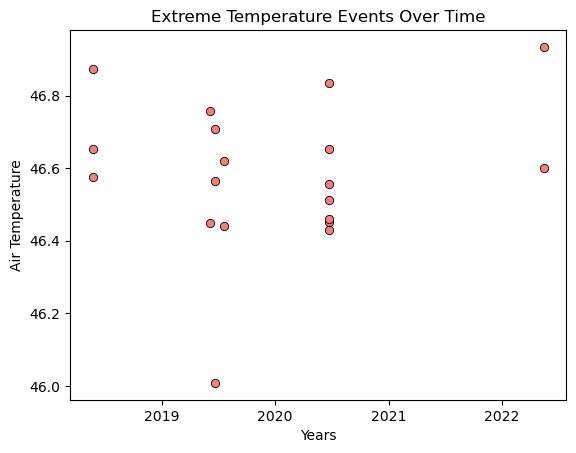

<Axes: title={'center': 'Extreme Temperature Events Over Time'}, xlabel='Years', ylabel='Air Temperature'>

In [20]:
from easy_mpl import plot

extreme_temperature_events = df_era5[df_era5['t2m'] > 46]

plot(extreme_temperature_events['t2m'], 'o',
     markerfacecolor='lightcoral',
     markeredgecolor="black", 
     markeredgewidth=0.6,
     ax_kws=dict(
        xlabel="Years",
        ylabel="Air Temperature",
        title='Extreme Temperature Events Over Time'))

### Part 3

#### 1. To compute PE, use the hargreaves samani 1982 function from tools.py. This function requires Tmax, Tmin, Tmean, latitude, and day of the year as input. Ra is calculated internally from latitude and day of the year. Derive all inputs for the function from the hourly ERA5 data:

In [21]:
tmin = df_era5['t2m'].resample('D').min().values
tmax = df_era5['t2m'].resample('D').max().values
tmean = df_era5['t2m'].resample('D').mean().values 
doy = df_era5['t2m'].resample('D').mean().index.dayofyear
lat = 21.25

#### 2. Compute the PE using:

In [22]:
import tools
pe = tools.hargreaves_samani_1982(tmin, tmax, tmean, lat, doy)

#### 3. Create a figure depicting the PE time series.

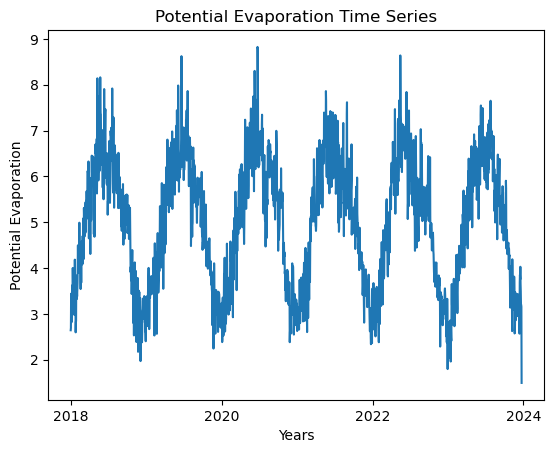

<Axes: title={'center': 'Potential Evaporation Time Series'}, xlabel='Years', ylabel='Potential Evaporation'>

In [23]:
# First, we need to create a timeseries using Pandas library.
# We will get index for our timeseries by resampling the hourly
# data to daily steps.
import pandas as pd
ts_index = df_era5['t2m'].resample('D').mean().index
pe = pd.Series(pe, index=ts_index)

plot(pe,
     ax_kws=dict(
        xlabel="Years",
        ylabel="Potential Evaporation",
        title='Potential Evaporation Time Series')
     )

#### 4. What is the mean annual PE in mm y−1?

In [24]:
pe_mean_annual = pe.resample('Y').sum().mean()
pe_mean_annual

1819.939

#### 5. Based on the mean annual PE, what is the volume of water potentially lost from the reservoir through evaporation anually? Assume the reservoir covers an area of 1.6 km2, as determined from satellite imagery from December 12, 2023.

In [25]:
# Given values
area_km2 = 1.6
height_mm = pe_mean_annual

# Conversion factors
sq_m_per_km2 = 1e6
mm_per_m = 1000

# Convert area to square meters
area_m2 = area_km2 * sq_m_per_km2

# Calculate volume
volume = area_m2 * height_mm * mm_per_m

print(f"The volume of water potentially lost from the reservoir through evaporation anually is {volume} cubic meters.")

The volume of water potentially lost from the reservoir through evaporation anually is 2911902343750.0 cubic meters.
